# Analysing Employee Exit Surveys - The Causes of Job Dissatisfaction

## Introduction

This project revolves around working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The two main questions we are trying to answer:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [2]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [3]:
# print(dete_survey.head())
print(tafe_survey.head())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

In [4]:
dete_survey.isnull().sum().sort_values(ascending=False).head(10)

Torres Strait                  819
South Sea                      815
Aboriginal                     806
Disability                     799
NESB                           790
Business Unit                  696
Classification                 367
Opportunities for promotion     87
Career Aspirations              76
Wellness programs               56
dtype: int64

In [5]:
tafe_survey.isnull().sum().sort_values(ascending=False).head(10)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. NONE                                       265
Contributing Factors. Other                                      265
Contributing Factors. Dissatisfaction                            265
Contributing Factors. Career Move - Self-employment              265
Contributing Factors. Career Move - Private Sector               265
dtype: int64

In [6]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [7]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

Firstly the data need to be cleaned to incorporate usable column names, and appropriate data types. 

With just over 800 entries, the DETE survey has a couple of columns which are largely empty; Torres Strait, South Sea, Aboriginal, Disability, NESB. These will most likely be removed unless containing important data. From the main causes of employee exit a large proportion (35%) is due to age retirment which is a positive sign. However with over 200 resigning and 100 leaving due to early retirment or not renewing contract, there is much to explore. 

The TAFE survey has close to 700 entries, with the main column missing data is the 'Main Factor' for leaving. This is alongside the many Contributing Factors containing a lot of blank values and a lot differing subjective, qualitative answers. Here a larger proportion of employees seem to be leaving due to resignnation (almost 50%), with much fewer staying on to retirement, suggesting a younger workforce and a higher churn rate. 

## Unnecessary column data

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
drop_columns = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(drop_columns, axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [9]:
drop_columns = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(drop_columns, axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

The DETE data was read in again, but account for null values entered as 'Not Stated'. Also about 20 columns were dropped as they did not contain relevant information to the question, and were largely about the career and performance of the employee

The TAFE data had almost 50 columns removed, that were mainly about Institutional and other work views which would is not key to the question at this time. It may offer further detail, if required later on. 

## Renaming columns

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace('\s+', '_').str.replace(r'/', '_').str.strip()

mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                                           702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
cease_date                                                                   695 non-null float64
separationtype                                                               701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

In [11]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

Made column names for DETE survey uniform in snake casing to make easy to read. 

Also specifically renamed a few of the particulary complex TAFE column names to match the DETE survey. 

## Filtering the data

Here we see the various reasons employees may have left the organisations. 

In [12]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [51]:
resignations = tafe_survey_updated['separationtype'] == 'Resignation'
tafe_resignations = tafe_survey_updated.loc[resignations].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [52]:
types = ['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate']
resignations = dete_survey_updated['separationtype'].isin(types)
dete_resignations = dete_survey_updated.loc[resignations].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

The problem we are interested is to do with employee resignations and therefore we are filtering the data to leave only the relevant rows. 

## Verifying the data

In [53]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [57]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('str').str.extract('(20[01][0-6])',expand=False).astype('float')
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [58]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [59]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

## Creating a new column

In order to match the column in the TAFE survey with information about the length of employment (institute_service), a new matching column is to be created in the DETE dataframe. Simply achieved by assigning the new column with the difference between the start and end years.

In [60]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

## Identifying dissatisfied employees

The following columns from each survey have been identified as being relevant to job dissatisfaction.

tafe_survey_updated:
1. Contributing Factors. Dissatisfaction
2. Contributing Factors. Job Dissatisfaction

dafe_survey_updated:
1. job_dissatisfaction
2. dissatisfaction_with_the_department
3. physical_work_environment
4. lack_of_recognition
5. lack_of_job_security
6. work_location
7. employment_conditions
8. work_life_balance
9. workload

In [61]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [62]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

The TAFE survey columns contain qualitative information which need to be converted to simpler boolean True and False entries. 

The DETE survey columns already contain True and False statements, so can be left as is.

In [63]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[cols] = tafe_resignations_up[cols].applymap(update_vals)
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[cols].any(axis=1, skipna=False)

cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations_up = dete_resignations.copy()
# dete_resignations_up[cols] = dete_resignations_up[cols].applymap(update_vals)
dete_resignations_up['dissatisfied'] = dete_resignations_up[cols].any(axis=1, skipna=False)
dete_resignations_up['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [64]:
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

The various columns have now been rolled up into a single 'dissatisfied' column to identify employees who resigned due to some sort of dissatisfaction for any reason. 

Collating the results we see 149 resignations due to dissatisfaction in the DETE survey, and 91 in the TAFE.

## Combining the data

Here we add a column to both survey dataframes, and combine them together while removing any columns with less than 500 non-null data values.

In [96]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


## Cleaning the service column

In [97]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [99]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract('([1-5][0-9]?)[-\. ]', expand=False).astype('float')
combined_updated['institute_service'].value_counts().sort_index(ascending=False)

49.0      1
42.0      1
41.0      1
39.0      3
38.0      1
36.0      2
35.0      1
34.0      1
33.0      1
32.0      3
31.0      1
30.0      2
29.0      1
28.0      2
27.0      1
26.0      2
25.0      2
24.0      4
23.0      4
22.0      6
21.0      3
20.0     17
19.0      3
18.0      5
17.0      6
16.0      5
15.0      7
14.0      6
13.0      8
12.0      6
11.0     30
10.0      6
5.0      56
4.0      16
3.0      83
2.0      14
1.0     159
Name: institute_service, dtype: int64

In [100]:
def service_map(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_map)
combined_updated['service_cat'].value_counts()

New            173
Experienced    155
Veteran        136
Established      6
Name: service_cat, dtype: int64

From the various formats for the length of service, the primary year was first extracted and stored back. These were then converted into new categories and added into a new column 'service_cat'

## Initial analysis

In [101]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [102]:
combined_updated['dissatisfied'].fillna(value=False, inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [118]:
pt = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
print(pt)

             dissatisfied
service_cat              
Established      0.166667
Experienced      0.316129
New              0.265896
Veteran          0.485294


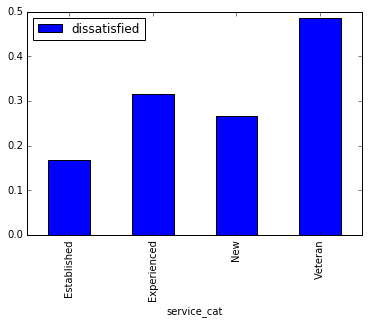

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
pt.plot(kind='bar')

We first replaced any final empty values with some data, and created a pivot table, grouping on service category to find the proportion of dissatisfied resignations per group. 

This revealed the Veteran status with the highest dissatisfaction at almost 50%, followed by the Experienced status at over 30%

## Next steps...

A few steps to continue with:

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?